In [97]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 72%; }
    div#menubar-container     { width: 72%; }
    div#maintoolbar-container { width: 72%; }
</style>
"""))

In [98]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sys
import termcolor

In [99]:
import seaborn as sns
sns.set(color_codes=True)
np.set_printoptions(suppress=True, formatter={'float_kind': '{:.3f}'.format})

In [100]:
plt.rcParams['figure.figsize'] = (10.0, 4.0) #set default size of plots
plt.rcParams['figure.dpi'] = 100 # to create high resolution images
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
print (sys.executable)
%load_ext autoreload
%autoreload 2

/root/anaconda3/bin/python
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
print (termcolor.colored('#############################################################################################################################', on_color='on_magenta'))
print (termcolor.colored('#####################             Welcome to Nathan\'s Gaussian Process Tutorial, have fun!          #########################', on_color='on_magenta'))
print (termcolor.colored('#############################################################################################################################', on_color='on_magenta'))

#############################################################################################################################
#####################             Welcome to Nathan's Gaussian Process Tutorial, have fun!          #########################
#############################################################################################################################


## Gaussian properties --- Marginalization, conditioning and Affine transformation

Suppose we have two random variables $\mathbf{f}_1 \in \mathbb{R}^{D_1}$ and $\mathbf{f}_2 \in \mathbb{R}^{D_2}$ such that the joint distribution follows:

\begin{equation}
    \begin{bmatrix}
        \mathbf{f}_1 
        \\
        \mathbf{f}_2
    \end{bmatrix}
    \sim
    \mathcal{N}\left(
    \begin{bmatrix}
    \boldsymbol{\mu}_1 \\
    \boldsymbol{\mu}_2 
    \end{bmatrix}
, 
\begin{bmatrix}
           \mathbf{K}_{11} & \mathbf{K}_{12} \\
           \mathbf{K}_{21} & \mathbf{K}_{22} 
\end{bmatrix}
\right)
\end{equation}

where $\mathbf{K}_{21} \triangleq \mathbf{K}_{12}^{\top}$ denotes the covariance between $\mathbf{f}_1$ and $\mathbf{f}_2$. Then we can derive the following two interesting properties:
    
   \begin{equation}
    \begin{array}{lcr}
         \mathrm{\textbf{Marginalization}:} \; \displaystyle p(\mathbf{f}_1) = \mathcal{N}(\boldsymbol{\mu}_1, \mathbf{K}_{11}), \;\; p(\mathbf{f}_2) = \mathcal{N}(\boldsymbol{\mu}_2, \mathbf{K}_{22}),
         \\
         \displaystyle \mathrm{\textbf{Conditioning}:} \; p(\mathbf{f}_1|\mathbf{f}_2) = \mathcal{N}(\boldsymbol{\mu}_1 + \mathbf{K}_{12}\mathbf{K}_{22}^{-1}(\mathbf{f}_2 - \boldsymbol{\mu}_2), \mathbf{K}_{11} - \mathbf{K}_{12}\mathbf{K}_{22}^{-1}\mathbf{K}_{21}).
    \end{array}  
    \label{cha1eq: marginalization & conditioning}
    \end{equation}


   Other than the properties above, suppose we have another two random variables $\mathbf{f}_a \in \mathbb{R}^{D_a}$ and $\mathbf{f}_b \in \mathbb{R}^{D_b}$ which satisfies:
   
  
  \begin{equation*}
    \begin{array}{lcr}
          p(\mathbf{f}_a) = \mathcal{N}(\boldsymbol{\mu}_a, \mathbf{K}_{aa})
          \\  
          p(\mathbf{f}_b|\mathbf{f}_a) = \mathcal{N}(\mathbf{M}\mathbf{f}_a + \mathbf{C},  \mathbf{K}_{bb|a})
    \end{array}
    \end{equation*}
    then another interesting property can be obtained:
    \begin{equation}
        \mathrm{\textbf{Affine Transformation}:}\; p(\mathbf{f}_b) = \mathcal{N}(\mathbf{M}\boldsymbol{\mu}_a + \mathbf{C}, \mathbf{K}_{bb|a} + \mathbf{M}\mathbf{K}_{aa}\mathbf{M}^{\top}).
    \label{cha1eq: affine transformation}
    \end{equation}

## Gaussian process

a GP is a collection of random variables, any finite number of which follow a joint Gaussian distribution. A GP is completely specified by its mean function and covariance/kernel function which could be written as:
\begin{equation}
\begin{array}{rl}
        \displaystyle f &\sim \mathcal{GP}(m_{\theta}(\mathbf{x}), k_{\theta}(\mathbf{x}, \mathbf{x}^\prime))
        \\
        \displaystyle m_{\theta}(\mathbf{x}) &= \mathbb{E}[f(\mathbf{x})]
        \\
        \displaystyle k_{\theta}(\mathbf{x}, \mathbf{x}^\prime) &= \mathbb{E}[(f(\mathbf{x}) - m_{\theta}(\mathbf{x}))(f(\mathbf{x}^\prime) - m_{\theta}(\mathbf{x}^\prime))].
\end{array}   
\end{equation}

$\mathbf{x}$ and $\mathbf{x}^\prime$ denote different input locations where the function $f$ is evaluated, and $\theta$ denotes the set of hyperparameters of the mean and kernel functions. A common choice for the mean function is $m_{\theta}(\mathbf{x})=0$ (since the prior knowledge and uncertainty about the mean function can be taken into account by adjusting the kernel function). 

After accounting for the mean function, the GP is fully specified by the form of the covariance/kernel function and the associated hyperparameters $\theta$. A widely used kernel is the __exponentiated quadratic__ or __squared exponential (SE) kernel__:
    \begin{equation}
        k_{\theta}(\mathbf{x}, \mathbf{x}^\prime) = \sigma_f^2 \exp (-0.5/l^2 \sum_{d=1}^D (x_d - x^\prime_d)^2).
    \end{equation}
    where $l_d$ is the lengthscale for the $d$-th input dimension, $\sigma_f^2$ is the kernel variance and the kernel hyperparameters $\theta = (l, \sigma_f)$.
    
Suppose we have a training dataset with $D$-dimensional inputs $\mathbf{X} \triangleq \{\mathbf{x}_n\}_{n=1}^{N}$ and their corresponding noisy observed scalar observations $\mathbf{y} \triangleq \{y_n\}_{n=1}^{N}$. A typical regression model assumes that each observation is the output from function $f$ evaluated at input $\mathbf{x}_n$, which is corrupted by an additive, identically and independently distributed (i.i.d.) Gaussian noise $\epsilon$:

   \begin{equation*}
    \begin{array}{lcr}
        \displaystyle \mathbf{y}_n = f(\mathbf{x}_n) + \epsilon. 
    \end{array}
    \end{equation*}
 
 
   where $\epsilon \sim \mathcal{N}(0, \sigma_n^2)$ with noise variance $\sigma_n^2$. This induces the likelihood of the observations in the training set:
   
 
   \begin{equation}
    \begin{array}{lcr}
        \displaystyle p(\mathbf{y}|\mathbf{f}) = \mathcal{N}(\mathbf{f}, \sigma_n^2 \mathbf{I})
        \\
        p(\mathbf{f}) = \mathcal{N}(\mathbf{0}, \mathbf{K}_{\mathbf{X}\mathbf{X}})
    \end{array}
    \end{equation}
    
   
   where $\mathbf{f} \triangleq \{f(\mathbf{x}_n)\}_{n=1}^{N}$ represents the latent function values and $\mathbf{K}_{\mathbf{X}\mathbf{X}}$ denotes the covariance matrix with components $k_{\theta}(\mathbf{x}_n, \mathbf{x}_{n^\prime})$ for $n, n^\prime = 1, 2, \dots, N$:
 
   \begin{equation}
        \mathbf{K}_{\mathbf{X}\mathbf{X}} = 
        \begin{pmatrix}
            k_{\theta}(\mathbf{x}_1, \mathbf{x}_1) & \dots & k_{\theta}(\mathbf{x}_1, \mathbf{x}_N)
            \\
            \vdots & \ddots & \vdots
            \\
            k_{\theta}(\mathbf{x}_N, \mathbf{x}_1) & \dots & k_{\theta}(\mathbf{x}_N, \mathbf{x}_N)
        \end{pmatrix}.
    \end{equation}

   Following the __affine transformation__ property defined previously, the marginal likelihood of the observations $\mathbf{y}$ can be written as:
   
   \begin{equation}
        p(\mathbf{y}) = \mathcal{N}(\mathbf{0}, \mathbf{K}_{\mathbf{X}\mathbf{X}} + \sigma_n^2 \mathbf{I})
    \end{equation}
    
    
   The task typically involves predicting the latent function value $f^{\star} = f(\mathbf{x}^{\star})$ at an unseen test input $\mathbf{x}^{\star}$. Since the joint distribution between the training observations $\mathbf{y}$ and latent function value $f^{\star}$ is a multivariate normal distribution, denoted as:
    \begin{equation}
        \begin{bmatrix}
            f^\star
            \\
            \mathbf{y}
        \end{bmatrix}
        \sim
        \mathcal{N}\left(
            \begin{bmatrix}
                0
                \\
                \mathbf{0}
            \end{bmatrix}
            ,
            \begin{bmatrix}
                k_{\mathbf{x}^{\star}\mathbf{x}^{\star}} & \mathbf{k}_{\mathbf{x}^{\star}\mathbf{X}}
                \\
                \mathbf{k}_{\mathbf{X}\mathbf{x}^{\star}} & \mathbf{K}_{\mathbf{X}\mathbf{X}} + \sigma_n^2 \mathbf{I}
            \end{bmatrix}
        \right)
    \end{equation}
    

   where $k_{\mathbf{x}^\star\mathbf{x}^\star} = k_{\theta}(\mathbf{x}^\star, \mathbf{x}^\star)$ is the variance of the test function value, $\mathbf{k}_{\mathbf{x}^\star\mathbf{X}} \triangleq \mathbf{k}_{\mathbf{X}\mathbf{x}^\star}^\top$ and $\mathbf{k}_{\mathbf{x}^\star\mathbf{X}}$ denotes a vector with components $k_{\theta}(\mathbf{x}^\star, \mathbf{x}_n)$ for $n = 1, 2, \dots, N$. Then the posterior distribution of $f^\star$ can be obtained according to the __conditioning__ property of multivariate Gaussian distribution:
   
   \begin{equation}
    \begin{array}{lcr}
        p(f^{\star}|\mathbf{y}) = \mathcal{N}(\mathbf{k}_{\mathbf{x}^\star\mathbf{X}}(\mathbf{K}_{\mathbf{X}\mathbf{X}}+ \sigma_n^2 \mathbf{I})^{-1}\mathbf{y}, k_{\mathbf{x}^\star\mathbf{x}^\star} - \mathbf{k}_{\mathbf{x}^\star\mathbf{X}}(\mathbf{K}_{\mathbf{X}\mathbf{X}}+ \sigma_n^2 \mathbf{I})^{-1}\mathbf{k}_{\mathbf{X}\mathbf{x}^\star})
    \end{array}
    \label{cha1eq: posterior}
    \end{equation}
   
   This suggests that the predictive distribution of the function value at an unseen test input is Gaussian-distributed with the posterior mean and variance. In this regard, a GP can been seen as a prior over the function $f$. Conditioning this prior on the training data results in a posterior that 'fits' the data.



> This is the minimum we need to know for implementing Gaussian processes and applying them to regression problems. The next section demonstrates how to implement GPs with pure `numpy` from scratch.

## GPs with Numpy

### Kernel

Recall from previous section, the __squared exponential (RBF)__ kernel:

   \begin{equation}
        k_{\theta}(\mathbf{x}, \mathbf{x}^\prime) = \sigma_f^2 \exp (-0.5/l^2 \sum_{d=1}^D (x_d - x^\prime_d)^2)
    \end{equation}
    
   \begin{equation}
        k_{\theta}(\mathbf{x}, \mathbf{x}^\prime) = \sigma_f^2 \exp \left(-\dfrac{1}{2l^2}(\mathbf{x} - \mathbf{x}^\prime)^{T}(\mathbf{x} - \mathbf{x}^\prime)\right)
    \end{equation}

where lengthscale $l$ controls the smoothness of the kernel fucntion and $\sigma_f$ controls the vertical variation 

In [6]:
import numpy as np
np.set_printoptions(suppress=True, formatter={'float_kind': '{:.3f}'.format})
def kernel(x1, x2, l = 1.0, sigma_f = 1.0):
    """
    Isotropic squared exponential kernel.
    
    Args:
        X1: Array of m points (m x d).
        X2: Array of n points (n x d).

    Returns:
        (m x n) matrix.
    """
    sqdist = np.sum(x1**2, axis=1).reshape(-1, 1) + np.sum(x2**2, axis=1) - 2 * x1 @ x2.T
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist) 

### Prior

   \begin{equation}
    \begin{array}{lcr}
        p(\mathbf{f}) = \mathcal{N}(\mathbf{0}, \mathbf{K}_{\mathbf{X}\mathbf{X}})
    \end{array}
    \end{equation}
    
   
   where $\mathbf{f} \triangleq \{f(\mathbf{x}_n)\}_{n=1}^{N}$ represents the latent function values and $\mathbf{K}_{\mathbf{X}\mathbf{X}}$ denotes the covariance matrix with components $k_{\theta}(\mathbf{x}_n, \mathbf{x}_{n^\prime})$ for $n, n^\prime = 1, 2, \dots, N$:
 
   \begin{equation}
        \mathbf{K}_{\mathbf{X}\mathbf{X}} = 
        \begin{pmatrix}
            k_{\theta}(\mathbf{x}_1, \mathbf{x}_1) & \dots & k_{\theta}(\mathbf{x}_1, \mathbf{x}_N)
            \\
            \vdots & \ddots & \vdots
            \\
            k_{\theta}(\mathbf{x}_N, \mathbf{x}_1) & \dots & k_{\theta}(\mathbf{x}_N, \mathbf{x}_N)
        \end{pmatrix}.
    \end{equation}

We first define a prior over functions with default kernel parameters $l = 1$ and $\sigma_f = 1$. To draw random functions from GP equals drawing random samples form the corresponding multivariate normal distribution. 

The following example draws three random samples and plots it together with the zero mean and the uncertainty region (the 95% highest density interval computed from the diagonal of the covariance matrix).

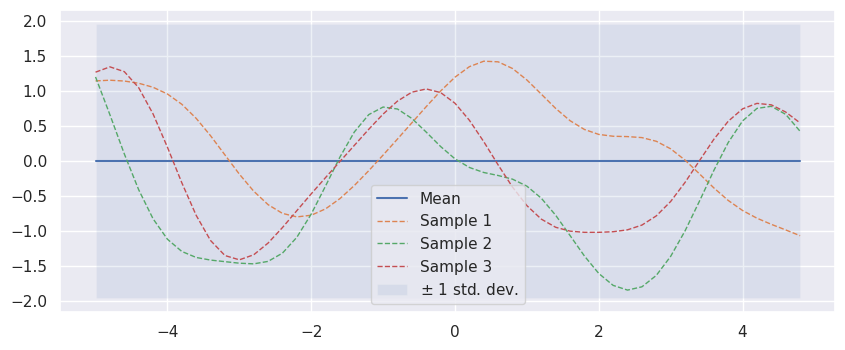

In [7]:
import utils
# Finite number of points
X = np.arange(-5, 5, 0.2).reshape(-1, 1)

# Mean and covariance of the prior
mu = np.zeros(X.shape)
cov = kernel(X, X)

# Draw three samples from the prior
samples = np.random.multivariate_normal(mu[:, 0], cov, 3)

# Plot GP mean, uncertainty region and samples 
utils.plot_gp(mu, cov, X, samples=samples)

### Predictions

The predictive __mean__ and __varaince__ is calculated according to Eq.10, which is:

   \begin{equation}
        p(f^{\star}|\mathbf{y}) = \mathcal{N}(\mathbf{k}_{\mathbf{x}^\star\mathbf{X}}(\mathbf{K}_{\mathbf{X}\mathbf{X}}+ \sigma_n^2 \mathbf{I})^{-1}\mathbf{y}, k_{\mathbf{x}^\star\mathbf{x}^\star} - \mathbf{k}_{\mathbf{x}^\star\mathbf{X}}(\mathbf{K}_{\mathbf{X}\mathbf{X}}+ \sigma_n^2 \mathbf{I})^{-1}\mathbf{k}_{\mathbf{X}\mathbf{x}^\star})
    \end{equation}

In [8]:
def prediction_naive(X_test, X_train, Y_train, l = 1.0, sigma_f = 1.0, sigma_n = 1e-3):
    """
    Computes the predictive mean and variance for `n` test 
    inputs X_test from `m` training data X_train and Y_train
    
    Args:
        X_test: New input locations (n x d).
        X_train: Training locations (m x d).
        Y_train: Training targets (m x 1).
        l: Kernel length parameter.
        sigma_f: Kernel vertical variation parameter.
        sigma_n: Noise parameter.
    
    Returns:
        Posterior mean vector (n x d) and covariance matrix (n x n).
    """
    K_xx = kernel(X_train, X_train, l, sigma_f) + sigma_n**2 * np.eye(len(X_train))
    K_t = kernel(X_train, X_test, l, sigma_f)
    K_tt = kernel(X_test, X_test, l, sigma_f) + 1e-8 * np.eye(len(X_test))
    K_xx_inv = np.linalg.inv(K_xx)
    
    # Equation (1)
    mu = K_t.T @ K_xx_inv @ Y_train

    # Equation (1)
    cov = K_tt - K_t.T @ K_xx_inv @ K_t
    
    return mu, cov

Fitting `X_train` and `Y_train`, the following example draws three examples from the posterior predictions and plots them.

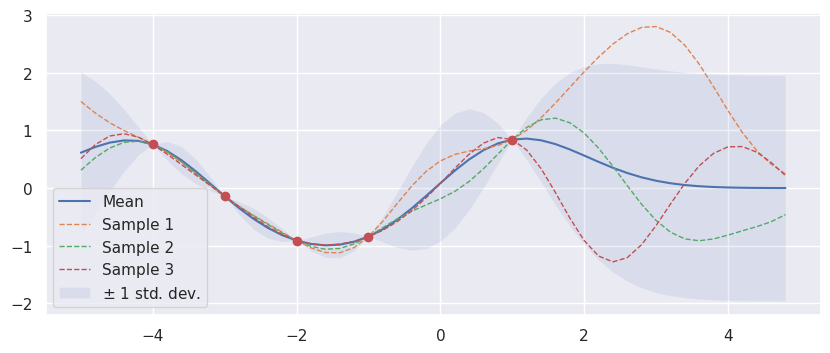

In [9]:
# Training data
X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
Y_train = np.sin(X_train)

# Compute mean and covariance of the posterior distribution
mean, cov = prediction_naive(X, X_train, Y_train)

samples = np.random.multivariate_normal(mean.ravel(), cov, 3)
utils.plot_gp(mean, cov, X, X_train=X_train, Y_train=Y_train, samples=samples)

### Numerical stability

Naive implementation of Eq.15 works well for the synthetic data points in this tutorial, but it suffers from numerically stability compared to the following implementation. 

A more numberical robuts algorithm is proposed in [Algorithm 2.1](http://gaussianprocess.org/gpml/chapters/RW2.pdf), which is shown as following:

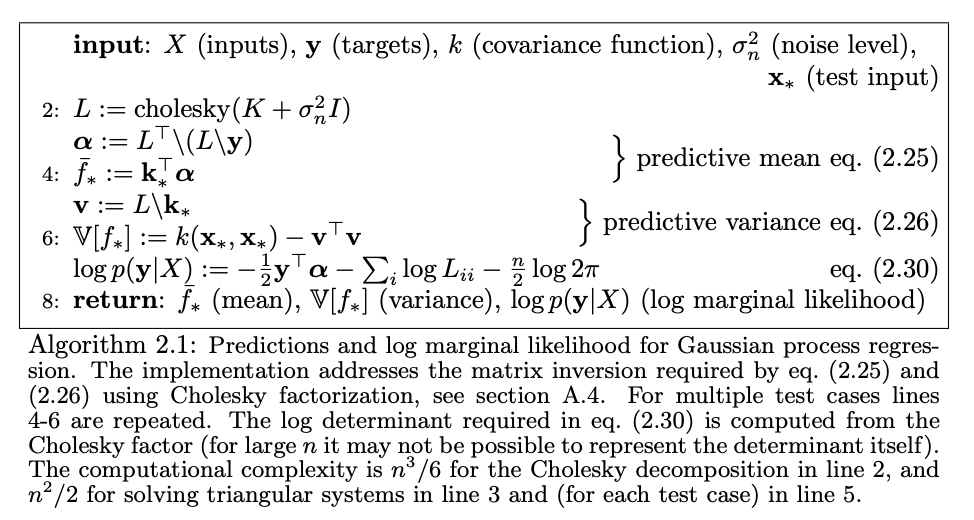

In [10]:
import scipy as sp
def prediction_stable(X_test, X_train, Y_train, l = 1.0, sigma_f = 1.0, sigma_n = 1e-3):
    """
    Computes the predictive mean and variance for `n` test 
    inputs X_test from `m` training data X_train and Y_train
    
    Args:
        X_test: New input locations (n x d).
        X_train: Training locations (m x d).
        Y_train: Training targets (m x 1).
        l: Kernel length parameter.
        sigma_f: Kernel vertical variation parameter.
        sigma_n: Noise parameter.
    
    Returns:
        Posterior mean vector (n x d) and covariance matrix (n x n).
    """
    K_xx = kernel(X_train, X_train, l, sigma_f) + sigma_n**2 * np.eye(len(X_train))
    K_t = kernel(X_train, X_test, l, sigma_f)
    K_tt = kernel(X_test, X_test, l, sigma_f) + 1e-8 * np.eye(len(X_test))
    # LLᵀ = Kxx, where L is a lower triangular matrix
    L = np.linalg.cholesky(K_xx)
    # alpha = Lᵀ\L\y
    L_inv_y = sp.linalg.solve_triangular(L, Y_train, lower = True) # L\y
    alpha = sp.linalg.solve_triangular(L.T, L_inv_y, lower = False) # Lᵀ\L\y
    
    # predictive mean for Equation (1) 
    mu = K_t.T @ alpha

    # predictive variance for Equation (1)
    v = sp.linalg.solve_triangular(L, K_t, lower = True) # L\K_t
    cov = K_tt - v.T @ v
    
    return mu, cov

In [11]:
mean_stable, cov_stable = prediction_stable(X, X_train, Y_train)
mean, cov = prediction_naive(X, X_train, Y_train)
np.sum(mean_stable - mean), np.sum(cov_stable - cov)

(-5.267270994369078e-15, -3.020466143491154e-14)

### Effect of kernel and noise hyperparameters

* The following example shows the effect of kernel parameters $l$ and $\sigma_f$ as well as the noise parameter $\sigma_n$. 
    - Higher $l$ values lead to smoother functions and therefore to coarser approximations of the training data. 
    - Lower $l$ values make functions more wiggly with wide uncertainty regions between training data points. 
    - $\sigma_f$ controls the vertical variation of functions drawn from the GP. This can be seen by the wide uncertainty regions outside the training data region in the right figure of the second row. 
    - $\sigma_n$ represents the amount of noise in the training data. Higher $\sigma_n$ values make more coarse approximations which avoids overfitting to noisy data.

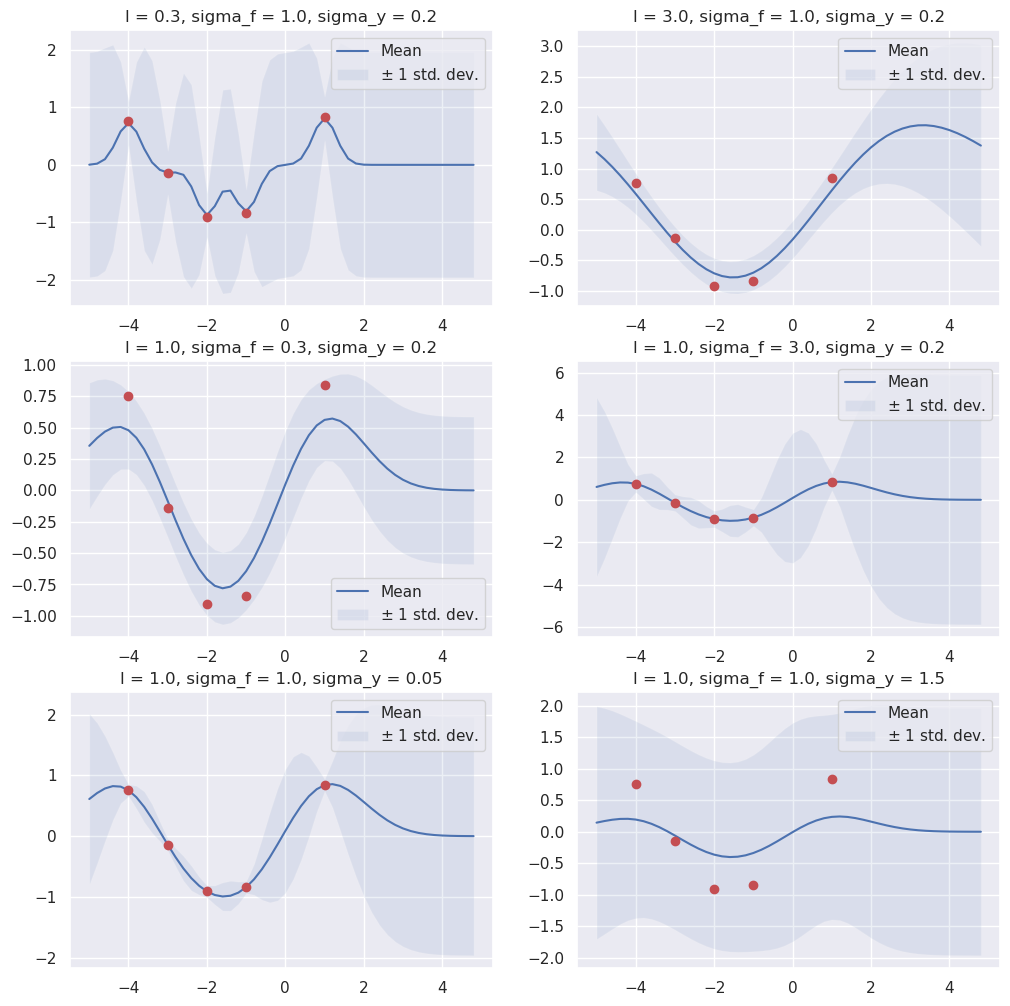

In [12]:
params = [
    (0.3, 1.0, 0.2),
    (3.0, 1.0, 0.2),
    (1.0, 0.3, 0.2),
    (1.0, 3.0, 0.2),
    (1.0, 1.0, 0.05),
    (1.0, 1.0, 1.5),
]

plt.figure(figsize=(12, 5))

for i, (l, sigma_f, sigma_n) in enumerate(params):
    mu_s, cov_s = prediction_stable(X, X_train, Y_train, l=l, 
                            sigma_f=sigma_f, 
                            sigma_n=sigma_n)
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(top=2)
    plt.title(f'l = {l}, sigma_f = {sigma_f}, sigma_y = {sigma_n}')
    utils.plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

### Training

   Therefore, the hyperparameters $\{l, \sigma_f, \sigma_n\}$ are usually selected by maximizing the marginal likelihood $p(\mathbf{y})$, in order to improve the fitting of the GP to the observed data.
    \begin{equation}
    \begin{array}{lcr}
        % \displaystyle p(\mathbf{y}) = \int  p(\mathbf{y}|\mathbf{f}) p(\mathbf{f})\,\mathrm{d}\mathbf{f} 
        % \\
        \displaystyle p(\mathbf{y}) = (2\pi)^{-\frac{N}{2}}|\mathbf{K}_{\mathbf{X}\mathbf{X}} + \sigma_n^2 \mathbf{I}|^{-\frac{1}{2}}\exp \left(-\dfrac{1}{2}\mathbf{y}^\top (\mathbf{K}_{\mathbf{X}\mathbf{X}} + \sigma_n^2 \mathbf{I})^{-1} \mathbf{y}\right)
    \end{array}
    \label{cha1eq: p(y)}
    \end{equation}
    A closer inspection of expression of the marginal likelihood reveals two key properties: the determinant controls the model complexity by penalizing complex models, hence making the resulting hyperparameters robust against overfitting; the exponential term ensures the goodness-of-fit to the data. 

Optimal values for these hyperparameters are estimated by maximizing the __log marginal likelihood__ which is:
\begin{equation}
\log p(\mathbf{y} \lvert \mathbf{X}) = 
\log \mathcal{N}(\mathbf{y} \lvert \boldsymbol{0},\mathbf{K}_{\mathbf{X}\mathbf{X}} + \sigma_n^2 \mathbf{I}) =
-\frac{1}{2} \mathbf{y}^T (\mathbf{K}_{\mathbf{X}\mathbf{X}} + \sigma_n^2 \mathbf{I})^{-1} \mathbf{y} 
-\frac{1}{2} \log \begin{vmatrix}\mathbf{K}_{\mathbf{X}\mathbf{X}} + \sigma_n^2 \mathbf{I}\end{vmatrix} 
-\frac{N}{2} \log(2\pi)
\end{equation}

During implementation, we will minimize the negative log marginal likelihood w.r.t $\{l, \sigma_f, \sigma_n\}$. Still, we apply this numerical stable implementation where

$$
\mathbf{L}\mathbf{L}^{T} = \mathbf{K}_{\mathbf{X}\mathbf{X}} + \sigma_n^2 \mathbf{I}
$$

$$
\frac{1}{2} \log |\mathbf{K}_{\mathbf{X}\mathbf{X}} + \sigma_n^2 \mathbf{I}| = \sum_{i}^{n}\mathrm{diag}(\mathbf{L})
$$

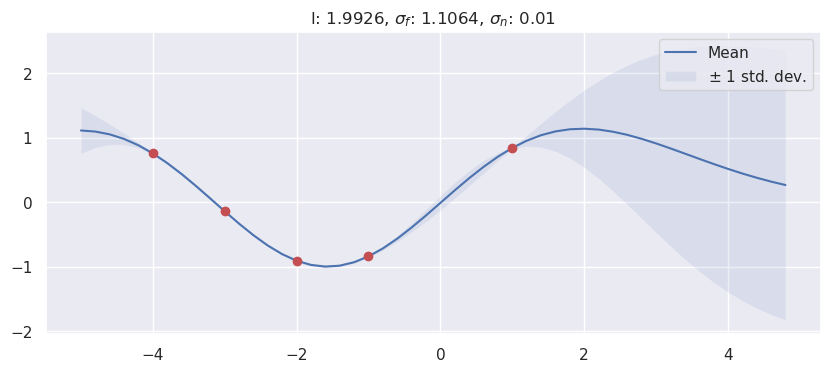

In [17]:
import numpy as np
np.set_printoptions(suppress=True, formatter={'float_kind': '{:.3f}'.format})
import scipy
import utils

def nll_fn(X_train, Y_train):
    """
    Returns a function that computes the negative log marginal
    likelihood for training data X_train and Y_train w.r.t
    l, sigma_f, sigma_n

    Args:
        X_train: training locations (m x d).
        Y_train: training targets (m x 1).

    Returns:
        Minimization objective.
    """
    
    Y_train = Y_train.ravel()
    
        
    def nll_stable(theta):
        # Numerically more stable implementation of Eq.(16) as described above
        
        K = kernel(X_train, X_train, l=theta[0], sigma_f=theta[1]) + \
            theta[2]**2 * np.eye(len(X_train))
        L = np.linalg.cholesky(K)
        
        S1 = sp.linalg.solve_triangular(L, Y_train, lower=True)
        S2 = sp.linalg.solve_triangular(L.T, S1, lower=False)
        
        return np.sum(np.log(np.diagonal(L))) + \
               0.5 * Y_train.dot(S2) + \
               0.5 * len(X_train) * np.log(2*np.pi)

    return nll_stable

# Minimize the negative log-likelihood w.r.t. parameters l and sigma_f and sigma_n
# We should actually run the minimization several times with different
# initializations to avoid local minima but this is skipped here for simplicity.
res = scipy.optimize.minimize(nll_fn(X_train, Y_train), [1, 1, 0.01], 
               bounds=((1e-5, None), (1e-5, None), (1e-2, None)),
               method='L-BFGS-B')

# Store the optimization results in global variables so that we can
# compare it later with the results from other implementations.
l_opt, sigma_f_opt, sigma_n_opt = res.x
# Compute posterior mean and covariance with optimized kernel parameters and plot the results
mu_s, cov_s = prediction_stable(X, X_train, Y_train, l=l_opt, sigma_f=sigma_f_opt, sigma_n=sigma_n_opt)
plt.title(f"l: {l_opt:.4f}, $\sigma_f$: {sigma_f_opt:.4f}, $\sigma_n$: {sigma_n_opt}")
utils.plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

### GP for higher dimensions

The implementation above can also be used for higher input data dimensions. Here, a GP is used to fit noisy samples from a sine wave originating at $\boldsymbol{0}$ and expanding in the x-y plane. The following plots show the samples and the predictive mean before and after kernel parameter optimization.

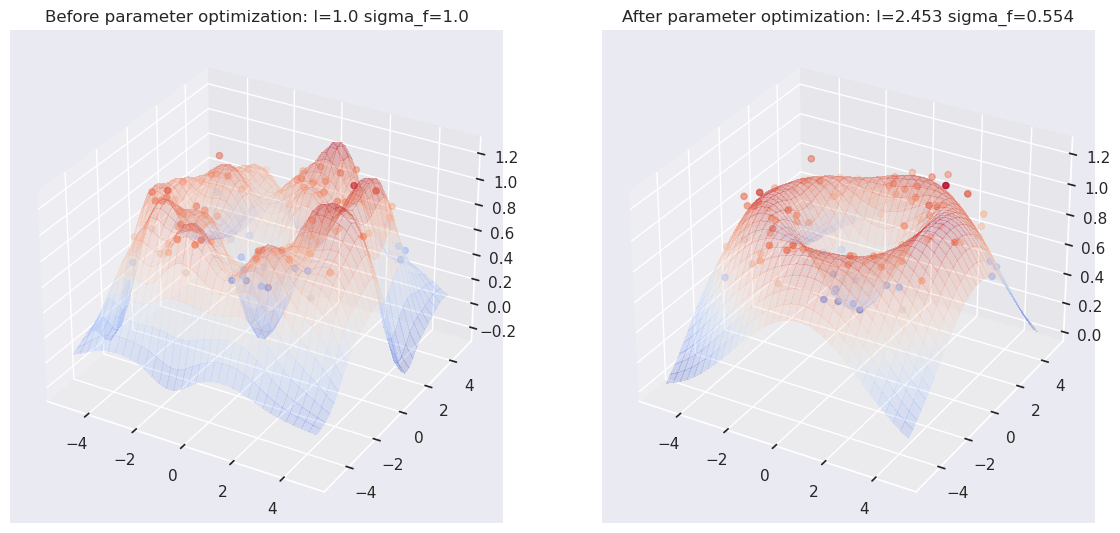

In [15]:
import numpy as np
import scipy as sp
import utils

noise_2D = 0.1

rx, ry = np.arange(-5, 5, 0.3), np.arange(-5, 5, 0.3)
gx, gy = np.meshgrid(rx, rx)

X_2D = np.c_[gx.ravel(), gy.ravel()]

X_2D_train = np.random.uniform(-4, 4, (100, 2))
Y_2D_train = np.sin(0.5 * np.linalg.norm(X_2D_train, axis=1)) + \
             noise_2D * np.random.randn(len(X_2D_train))

plt.figure(figsize=(14,7))

mu_s, _ = prediction_stable(X_2D, X_2D_train, Y_2D_train, sigma_n=noise_2D)
utils.plot_gp_2D(gx, gy, mu_s, X_2D_train, Y_2D_train, 
           f'Before parameter optimization: l={1.00} sigma_f={1.00}', 1)

res = sp.optimize.minimize(nll_fn(X_2D_train, Y_2D_train), [1, 1, 0.1], 
               bounds=((1e-5, None), (1e-5, None), (0.1, None)),
               method='L-BFGS-B')

mu_s, _ = prediction_stable(X_2D, X_2D_train, Y_2D_train, *res.x)
utils.plot_gp_2D(gx, gy, mu_s, X_2D_train, Y_2D_train,
           f'After parameter optimization: l={res.x[0]:.3f} sigma_f={res.x[1]:.3f}', 2)

## Variational sparse Gaussian process

Though highly expressive, full Gaussian process can not deal with large training datasets since computation of $ (\mathbf{K}_{\mathbf{X}\mathbf{X}} + \sigma_n^2 \mathbf{I})^{-1}$ incurs $\mathcal{O}(N^3)$ where $n$ is the size of the training set. In the mean time, __variational sparse GPs__ are based on a small set of $m$ inducing variables which can reduce the time complexity into $\mathcal{O}(M^3)$, Since the size of $m$ does not change, we can say for __variational sparse GPs__ the time complexity is __*constant*__

### Sparse Gaussian process

To improve the time efficiency of GP, the idea of __sparse Gaussian process__ (SGP) models which exploits low-rank covariance matrix approximations have been proposed. The key idea is to exploit the notion of _iducing varaibles_ to approximate a low-rank representation of the covaraince $\mathbf{K}_{\mathbf{X}\mathbf{X}}$.

Specifically, we introduce a set $\mathbf{u} \triangleq \{ u_m = f(\mathbf{z}_m) \}_{m=1}^{M}$ of inducing  variables for some small set of $\mathbf{Z} \triangleq \{\mathbf{z}_m\}_{m=1}^{M}$ of inducing inputs (i.e. $M \ll N$). Note that the inducing inputs $\mathbf{Z}$ are not necessarily a subset of the training inputs $\mathbf{X}$, they can be located anywhere within the input domain and thus can also be treated as trainable parameters and optimized. Equipped with the inducing variables, the joint probability distribution becomes:

   \begin{equation}
    \begin{array}{lcr}
        \displaystyle p(\mathbf{y}, \mathbf{f}, \mathbf{u}) = p(\mathbf{y}|\mathbf{f})p(\mathbf{f}|\mathbf{u})p(\mathbf{u})  
        \\
        \displaystyle p(\mathbf{u}) = \mathcal{N}(\mathbf{0}, \mathbf{K}_{\mathbf{Z}\mathbf{Z}})
    \end{array}
    \end{equation}
    
   where $\mathbf{K}_{\mathbf{Z}\mathbf{Z}}$ denotes the covariance matrix with components $k_{\theta}(\mathbf{z}_m, \mathbf{z}_{m'})$ for $m, m' = 1, \dots, M$. As for the distribution of $p(\mathbf{f}|\mathbf{u})$, according to the __Gaussian conditioning__ property, it is trivial to derive:
   
   \begin{equation}
    \begin{array}{lcr}
        \displaystyle p(\mathbf{f}|\mathbf{u}) = \mathcal{N}(\mathbf{K}_{\mathbf{X}\mathbf{Z}}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1}\mathbf{u}, \mathbf{K}_{\mathbf{X}\mathbf{X}} - \mathbf{Q}_{\mathbf{X}\mathbf{X}})
    \end{array}
    \end{equation}
    
 where $\mathbf{Q}_{\mathbf{X}\mathbf{X}} \triangleq \mathbf{K}_{\mathbf{X}\mathbf{Z}}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1}\mathbf{K}_{\mathbf{Z}\mathbf{X}}$. 
   
   The name _inducing variables_ is motivated by the fact that $\mathbf{f}$ and $f^\star$ can only communicate through $\mathbf{u}$, and $\mathbf{u}$ therefore _induces_ the dependencies between training and test data. Technically speaking, this implies that $\mathbf{f}$ and $f^\star$ are independent conditioned on $\mathbf{u}$, denoted as:
   
   \begin{equation}
        p(\mathbf{f}, f^{\star}|\mathbf{u}) = \mathcal{N}\left(
        \begin{bmatrix}
            \mathbf{K}_{\mathbf{X}\mathbf{Z}}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1}\mathbf{u}
            \\
            \mathbf{K}_{\mathbf{x}^{\star}\mathbf{Z}}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1}\mathbf{u}
        \end{bmatrix}
        ,
        \begin{bmatrix}
            \mathbf{K}_{\mathbf{X}\mathbf{X}} - \mathbf{Q}_{\mathbf{X}\mathbf{X}} & 0
            \\
            0 & \mathbf{K}_{\mathbf{x}^{\star}\mathbf{x}^{\star}} - \mathbf{Q}_{\mathbf{x}^{\star}\mathbf{x}^{\star}}
        \end{bmatrix}
        \right)
    \label{cha1eq: f, f*|u real}
    \end{equation}
    
   where $\mathbf{Q}_{\mathbf{x}^{\star}\mathbf{x}^{\star}} \triangleq \mathbf{K}_{\mathbf{x}^{\star}\mathbf{Z}}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1}\mathbf{K}_{\mathbf{Z}\mathbf{x}^{\star}}$. $\mathbf{K}_{\mathbf{X}\mathbf{Z}} \triangleq \mathbf{K}_{\mathbf{Z}\mathbf{X}}^{\top}$, and $\mathbf{K}_{\mathbf{Z}\mathbf{X}}$ denote a matrix with components $k(\mathbf{z}_m, \mathbf{x}_{n})$ for $m =1,\ldots,M$ and $n=1,\ldots,N$. 
    $\mathbf{K}_{\mathbf{x}^{\star}\mathbf{Z}} \triangleq \mathbf{K}_{\mathbf{Z}\mathbf{x}^{\star}}^{\top}$, and $\mathbf{K}_{\mathbf{Z}\mathbf{x}^{\star}}$ denotes a matrix with components $k(\mathbf{z}_m, \mathbf{x}^\star)$ for $m =1,\ldots,M$. 

### Variational SGP Training

Similar to full GP prediction, the predictive __mean__ and __variance__ for SGP can be written as:

\begin{equation}
        p(f^{\star}|\mathbf{y}) = \iint p(f^{\star} | \mathbf{f}, \mathbf{u}) p(\mathbf{f}, \mathbf{u}| \mathbf{y})\; \mathrm{d}\mathbf{f}\mathrm{d}\mathbf{u}
    \end{equation}

However, the posterior distribution of $p(\mathbf{f}, \mathbf{u}| \mathbf{y})$ is intractable. To this end, a _variational inference_ (VI) approach which involves minimizing the KL distance between the variational posterior distribution $q(\mathbf{f}, \mathbf{u})$ and the true posterior distribution $p(\mathbf{f}, \mathbf{u}|\mathbf{y})$ denoted as $\mathrm{KL}[q(\mathbf{f}, \mathbf{u})||p(\mathbf{f}, \mathbf{u}|\mathbf{y})]$, which can be denoted as:

   \begin{equation}
    \begin{array}{lcr}
            \displaystyle \mathrm{KL}(q(\mathbf{f}, \mathbf{u})||p(\mathbf{f}, \mathbf{u}|\mathbf{y})) = \iint q(\mathbf{f}, \mathbf{u}) \log \dfrac{q(\mathbf{f}, \mathbf{u}) p(\mathbf{y})}{p(\mathbf{y}, \mathbf{f}, \mathbf{u})}\ \mathrm{d} \mathbf{f} \mathrm{d}\mathbf{u} 
            \\
            \displaystyle \hspace{39mm} = \log p(\mathbf{y}) - \iint q(\mathbf{f}, \mathbf{u}) \log \dfrac{p(\mathbf{y}, \mathbf{f}, \mathbf{u})}{q(\mathbf{f}, \mathbf{u})}\ \mathrm{d} \mathbf{f} \mathrm{d}\mathbf{u}
            \\
            \displaystyle \hspace{39mm} = \log p(\mathbf{y}) - \mathcal{L}(q)
    \end{array}
    \label{cha1eq: elbo + kl}
    \end{equation}


   where $\mathcal{L}(q)$ represents the _evidence lower bound_ (ELBO). As can be seen,  the sum of the KL distance and the ELBO is the log-marginal likelihood $\log p(\mathbf{y})$, which is a constant with respect to $q(\mathbf{f}, \mathbf{u})$. In the VI approach, the variational posterior approximation can also be represented as:
    \begin{equation}
        q(\mathbf{f}, \mathbf{u}) = p(\mathbf{f}|\mathbf{u})q(\mathbf{u})
    \end{equation}

   where $q(\mathbf{u})$ is a free variational Gaussian distribution. The ELBO can then be simplified as:
   $$\require{cancel}$$ 
   \begin{equation}
    \begin{array}{lcr}
        \displaystyle \mathcal{L}(q) = \iint p(\mathbf{f}|\mathbf{u})q(\mathbf{u})\log \dfrac{p(\mathbf{y}|\mathbf{f})p(\mathbf{f}|\mathbf{u})p(\mathbf{u})}{p(\mathbf{f}|\mathbf{u})q(\mathbf{u})}\ \mathrm{d}\mathbf{f}\mathrm{d}\mathbf{u}
        \\
        \displaystyle \hspace{13mm} = \iint p(\mathbf{f}|\mathbf{u})q(\mathbf{u})\log \dfrac{p(\mathbf{y}|\mathbf{f})\cancel{p(\mathbf{f}|\mathbf{u})}p(\mathbf{u})}{\cancel{p(\mathbf{f}|\mathbf{u})}q(\mathbf{u})}\ \mathrm{d}\mathbf{f}\mathrm{d}\mathbf{u}
        \\
        \displaystyle \hspace{13mm} = \mathbb{E}_{q(\mathbf{f})}[\log p(\mathbf{y}|\mathbf{f})] - \mathrm{KL}[q(\mathbf{u})||p(\mathbf{u})], \;\; q(\mathbf{f}) = \int p(\mathbf{f}|\mathbf{u}) q(\mathbf{u}) \ \mathrm{d}\mathbf{u}.
    \end{array}
    \end{equation}

where 
   \begin{equation}
    \begin{array}{lcr}
        \displaystyle p(\mathbf{u}) = \mathcal{N}(\mathbf{0}, \mathbf{K}_{\mathbf{Z}\mathbf{Z}})
        \\
        \displaystyle p(\mathbf{f}|\mathbf{u}) = \mathcal{N}(\mathbf{K}_{\mathbf{X}\mathbf{Z}}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1}\mathbf{u}, \mathbf{K}_{\mathbf{X}\mathbf{X}} - \mathbf{Q}_{\mathbf{X}\mathbf{X}})
        \\
        \displaystyle \log p(\mathbf{y}|\mathbf{f}) = \mathbf{y} \log \sigma(\mathbf{f}) + (1 - \mathbf{y})\log (1 - \sigma(\mathbf{f}))
    \end{array}
    \end{equation}

The variational posterior distribution of $q(\mathbf{u})$ is treated as free variational parameters $q(\mathbf{u}) = \mathcal{N}(\mathbf{m}, \mathbf{S})$. The KL divergence can be written as:

$$
\mathrm{KL}[q(\mathbf{u})||p(\mathbf{u})] = 0.5 * \left(\mathrm{Tr}(\mathbf{S}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1}) + \mathbf{m}^{T}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1}\mathbf{m} + \log|\mathbf{K}_{\mathbf{Z}\mathbf{Z}}| - \log |\mathbf{S}| - k\right)
$$

Still applying the __marginalization__ property, 
$$
q(\mathbf{f}) = \mathcal{N}(\mathbf{K}_{\mathbf{X}\mathbf{Z}}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1}\mathbf{m}, \mathbf{Q}_{\mathbf{X}\mathbf{X}} + \mathbf{K}_{\mathbf{X}\mathbf{Z}}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1} S \mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-T}\mathbf{K}_{\mathbf{Z}\mathbf{X}})
$$ 

### Prepare the training data

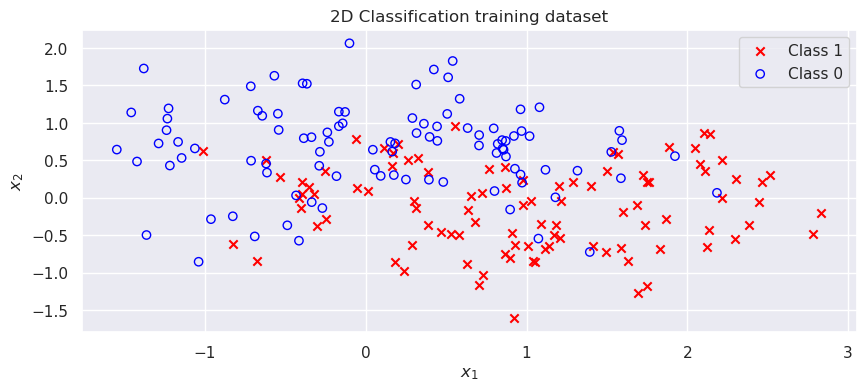

In [18]:
from sklearn.datasets import make_moons
import utils
X, y = make_moons(200, noise=0.5, random_state=1)
y = y.reshape(-1, 1)

utils.plot_data_2D(X, y)
plt.title('2D Classification training dataset')
plt.legend();

#### Compute the $\mathrm{KL}[q(\mathbf{u})||p(\mathbf{u})]$ 

The KL divergence is written as:
$$
\mathrm{KL}[q(\mathbf{u})||p(\mathbf{u})] = 0.5 * \left(\mathrm{Tr}(\mathbf{S}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1}) + \mathbf{m}^{T}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1}\mathbf{m} + \log|\mathbf{K}_{\mathbf{Z}\mathbf{Z}}| - \log |\mathbf{S}| - k\right)
$$ 

In a numerical implementation, we also apply Cholesky decomposition to $\mathbf{K}_{\mathbf{Z}\mathbf{Z}} = \mathbf{L} \mathbf{L}^{T}$ and $\mathbf{S} = \mathbf{L}_q \mathbf{L}_q^{T}$, then with $\mathbf{B} = \mathbf{L}\backslash \mathbf{L}_q$ and $\alpha = \mathbf{L}\backslash \mathbf{m}$

$$
\mathrm{KL}[q(\mathbf{u})||p(\mathbf{u})] = \dfrac{1}{2} * \left(\sum_{i, j}(\mathbf{B}_{i, j})^2 - k + \alpha^{T}\alpha + 2 \sum_{1}^{k} \log \dfrac{(\mathbf{L})_{ii}}{(\mathbf{L}_q)_{ii}}\right)
$$

In [19]:
import numpy as np
import scipy as sp

def kernel(x1, x2, l = 1.0, sigma_f = 1.0):
    """
    Isotropic squared exponential kernel.
    
    Args:
        X1: Array of m points (m x d).
        X2: Array of n points (n x d).

    Returns:
        (m x n) matrix.
    """
    sqdist = np.sum(x1**2, axis=1).reshape(-1, 1) + np.sum(x2**2, axis=1) - 2 * x1 @ x2.T
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist) 

def compute_kl(Z, m, Lq, l, sigma_f):
    k = Z.shape[0]
    if m.ndim == 1: m = m[:, None]
    if Lq.ndim == 1: Lq = np.diag(Lq)
    Kzz = kernel(Z, Z, l, sigma_f) + 1e-5 * np.eye(k)
    # LLᵀ = Kxx, where L is a lower triangular matrix
    L = np.linalg.cholesky(Kzz)
    # B = L\Lq
    B = sp.linalg.solve_triangular(L, Lq, lower = True)
    alpha = sp.linalg.solve_triangular(L, m, lower = True)
    kl = np.sum(B)
    kl -= k
    kl += np.sum(alpha**2)
    kl += 2 * np.sum(np.log(np.diagonal(L)))
    kl -= 2 * np.sum(np.log(np.diagonal(Lq)))
    return 0.5 * kl

In [20]:
Z, m, Lq, l, sigma_f = np.random.randn(5, 2), np.zeros(5), np.ones(5), 1.0, 1.0
compute_kl(Z, m, Lq, l, sigma_f)

-1.7106749605609441

In [21]:
# make Kzz equals to diagnol matrix, KL divergence is almost zero
Z, m, Lq, l, sigma_f = np.random.randn(5, 2), np.zeros(5), np.ones(5), 0.00001, 1.0
compute_kl(Z, m, Lq, l, sigma_f)

1.2499968750161216e-05

### Compute the $\mathbb{E}_{q(\mathbf{f})}[\log p(\mathbf{y}|\mathbf{f})]$ with Gaussian Hermite Quadrature

$$
\mathbb{E}_{q(\mathbf{f})}[\log p(\mathbf{y}|\mathbf{f})] = \mathbb{E}_{q(\mathbf{f})}\left[\mathbf{y} \log \sigma(\mathbf{f}) + (1 - \mathbf{y})\log (1 - \sigma(\mathbf{f}))\right]\; \mathrm{where}\; q(\mathbf{f}) = \mathcal{N}(\mathbf{K}_{\mathbf{X}\mathbf{Z}}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1}\mathbf{m}, \mathbf{Q}_{\mathbf{X}\mathbf{X}} + \mathbf{K}_{\mathbf{X}\mathbf{Z}}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1} S \mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-T}\mathbf{K}_{\mathbf{Z}\mathbf{X}})
$$

> Consider a function $g(f)$, where the variable $f$ is Normally distributed: $q(f) = \mathcal{N}(\mu, \sigma^2)$. The expectation of $g(f)$ can be approximated with Gaussian Hermite quadrature as: $E[g(f)] \approx \frac{1}{\sqrt{\pi}} \sum_{i=1}^n w_i h(\sqrt{2} \sigma x_i + \mu)$ where $w_i$ and $x_i$ are sampled from Gaussian Hermite quadrature with total degree of $n$

In [22]:
import numpy as np
import scipy as sp
from scipy.special import expit as sigmoid

def kernel(x1, x2, l = 1.0, sigma_f = 1.0):
    """
    Isotropic squared exponential kernel.
    
    Args:
        X1: Array of m points (m x d).
        X2: Array of n points (n x d).

    Returns:
        (m x n) matrix.
    """
    sqdist = np.sum(x1**2, axis=1).reshape(-1, 1) + np.sum(x2**2, axis=1) - 2 * x1 @ x2.T
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist) 

def conditional(X, Z, qmean, Lq, l, sigma_f):
    """
    Given a f and u, and distribution p and q such that::

    p(u) = N(u; 0, Kzz), Kzz = L * Lᵀ
    p(f) = N(f; 0, Kxx)
    p(f|u) = N(f; Kxz (Kzz⁻¹) u, Kxx - Kxz (Kzz⁻¹) Kzx)

    And::

    q(u) = N(u; m, diag(Lq))

    This method computes the mean and (co)variance of::
    q(f) = ∫ p(f|u) q(u) du
    """
    N, M = X.shape[0], Z.shape[0]
    if qmean.ndim == 1: qmean = qmean[:, None]
    if Lq.ndim == 1: Lq = np.diag(Lq)
    Kzz = kernel(Z, Z, l, sigma_f) + 1e-5 * np.eye(M)
    Kzx = kernel(Z, X, l, sigma_f)
    Kxx = kernel(X, X, l, sigma_f) + 1e-5 * np.eye(N)
    # LLᵀ = Kxx, where L is a lower triangular matrix
    L = np.linalg.cholesky(Kzz)
    # A = L\Kzx
    A = sp.linalg.solve_triangular(L, Kzx, lower = True)
    # Kxx - Kxz (Kzz⁻¹) Kzx
    f_var = Kxx - A.T @ A 
    # A = Lᵀ\L\Kzx
    A = sp.linalg.solve_triangular(L.T, A, lower=False)
    f_mean = A.T @ qmean
    # Kxx - Kxz (Kzz⁻¹) Kzx +  Kxz (Kzz⁻¹) S (Kzz⁻¹) Kzx
    f_var += A.T @ Lq @ Lq.T @ A
    f_var = np.diag(f_var)[:, None]
    return f_mean, f_var
    
    
def variational_expectations(X, y, Z, qmean, Lq, l, sigma_f):
    
    y = y.astype(np.float)
    x_gh, w_gh = np.polynomial.hermite.hermgauss(20) # normally degree is set to be 20
    x_gh, w_gh = x_gh.reshape(1, -1), w_gh.reshape(1, -1) 
    
    f_mean, f_var = conditional(X, Z, qmean, Lq, l, sigma_f)
    x = x_gh * np.sqrt(2. * f_var) + f_mean
    f = sigmoid(x)
    logp = np.sum(w_gh * (y * np.log(f) + (1 - y) * np.log(1 - f)))
    return logp

### Building up the ELBO

By now, we have gathered all the ingredients to build up the ELBO, the implementation is shown as following:

In [23]:
import numpy as np
import scipy as sp
from scipy.special import expit as sigmoid

def kernel(x1, x2, l = 1.0, sigma_f = 1.0):
    """
    Isotropic squared exponential kernel.
    
    Args:
        X1: Array of m points (m x d).
        X2: Array of n points (n x d).

    Returns:
        (m x n) matrix.
    """
    sqdist = np.sum(x1**2, axis=1).reshape(-1, 1) + np.sum(x2**2, axis=1) - 2 * x1 @ x2.T
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist) 

def compute_kl(Z, m, Lq, l, sigma_f):
    k = Z.shape[0]
    if m.ndim == 1: m = m[:, None]
    if Lq.ndim == 1: Lq = np.diag(Lq)
    Kzz = kernel(Z, Z, l, sigma_f) + 1e-5 * np.eye(k)
    # LLᵀ = Kxx, where L is a lower triangular matrix
    L = np.linalg.cholesky(Kzz)
    # B = L\Lq
    B = sp.linalg.solve_triangular(L, Lq, lower = True)
    alpha = sp.linalg.solve_triangular(L, m, lower = True)
    kl = np.sum(B)
    kl -= k
    kl += np.sum(alpha**2)
    kl += 2 * np.sum(np.log(1e-5 + np.diagonal(L)))
    kl -= 2 * np.sum(np.log(1e-5 + np.diagonal(Lq)))
    return 0.5 * kl

def conditional(X, Z, qmean, Lq, l, sigma_f):
    """
    Given a f and u, and distribution p and q such that::

    p(u) = N(u; 0, Kzz), Kzz = L * Lᵀ
    p(f) = N(f; 0, Kxx)
    p(f|u) = N(f; Kxz (Kzz⁻¹) u, Kxx - Kxz (Kzz⁻¹) Kzx)

    And::

    q(u) = N(u; m, diag(Lq))

    This method computes the mean and (co)variance of::
    q(f) = ∫ p(f|u) q(u) du
    """
    N, M = X.shape[0], Z.shape[0]
    if qmean.ndim == 1: qmean = qmean[:, None]
    if Lq.ndim == 1: Lq = np.diag(Lq)
    Kzz = kernel(Z, Z, l, sigma_f) + 1e-5 * np.eye(M)
    Kzx = kernel(Z, X, l, sigma_f)
    Kxx = kernel(X, X, l, sigma_f) + 1e-5 * np.eye(N)
    # LLᵀ = Kxx, where L is a lower triangular matrix
    L = np.linalg.cholesky(Kzz)
    # A = L\Kzx
    A = sp.linalg.solve_triangular(L, Kzx, lower = True)
    # Kxx - Kxz (Kzz⁻¹) Kzx
    f_var = Kxx - A.T @ A 
    # A = Lᵀ\L\Kzx
    A = sp.linalg.solve_triangular(L.T, A, lower=False)
    f_mean = A.T @ qmean
    # Kxx - Kxz (Kzz⁻¹) Kzx +  Kxz (Kzz⁻¹) S (Kzz⁻¹) Kzx
    f_var += A.T @ Lq @ Lq.T @ A
    f_var = np.diag(f_var)[:, None]
    return f_mean, f_var
    
    
def variational_expectations(X, y, Z, qmean, Lq, l, sigma_f):
    
    y = y.astype(np.float)
    x_gh, w_gh = np.polynomial.hermite.hermgauss(20) # normally degree is set to be 20
    x_gh, w_gh = x_gh.reshape(1, -1), w_gh.reshape(1, -1) 
    
    f_mean, f_var = conditional(X, Z, qmean, Lq, l, sigma_f)
    x = x_gh * np.sqrt(2. * f_var) + f_mean
    f = sigmoid(x)
    logp = np.sum(w_gh * (y * np.log(f + 1e-5) + (1 - y) * np.log(1 - f + 1e-5)))
    return logp

def compute_elbo(X, y, Z, qmean, Lq, l, sigma_f):
    var_ep = variational_expectations(X, y, Z, qmean, Lq, l, sigma_f)
    kl = compute_kl(Z, qmean, Lq, l, sigma_f)
    return var_ep - 0.3 * kl

### Maximize the ELBO

In [24]:
def pack_params(Z, qmean, Lq, l, sigma_f):
    Z_ravel = Z.ravel()
    return np.concatenate([Z_ravel, qmean, Lq, [l], [sigma_f]])

def unpack_params(theta):
    Z = theta[:10]
    Z = np.reshape(Z, [5, 2])
    qmean = theta[10: 15]
    Lq = theta[15: 20]
    l = theta[-2]
    sigma_f = theta[-1]
    return Z, qmean, Lq, l, sigma_f

def elbo_fn(X, y):
    def neg_elbo(theta):
        Z, m, Lq, l, sigma_f = unpack_params(theta)
        return -compute_elbo(X, y, Z, m, Lq, l, sigma_f)
    return neg_elbo

In [25]:
Z, m, Lq, l, sigma_f = np.random.randn(5, 2), np.zeros(5), np.ones(5), 1.0, 1.0
theta = pack_params(Z, m, Lq, l, sigma_f)
# Minimize the negative ELBO w.r.t. parameters Z, m, Lq, l, sigma_f
res = scipy.optimize.minimize(elbo_fn(X, y), theta,
                              bounds=((None, None), (None, None), (None, None), (None, None), (None, None),
                                      (None, None), (None, None), (None, None), (None, None), (None, None),
                                      (-5, 5), (-5, 5), (-5, 5), (-5, 5), (-5, 5),
                                      (1e-5, None), (1e-5, None), (1e-5, None), (1e-5, None), (1e-5, None),
                                      (1e-5, None), (1e-5, None)),
                              method='L-BFGS-B')

In [26]:
res.x

array([1.440, 0.318, -0.298, -0.444, 8.389, -29.535, 0.668, 1.708, -0.126,
       0.586, 0.821, 0.763, 0.232, -3.807, -1.355, 0.113, 0.180, 22.944,
       0.537, 0.103, 8.105, 11.494])

### Predictions

In [27]:
import numpy as np
import scipy as sp
from scipy.special import expit as sigmoid


def conditional(X, Z, qmean, Lq, l, sigma_f):
    """
    Given a f and u, and distribution p and q such that::

    p(u) = N(u; 0, Kzz), Kzz = L * Lᵀ
    p(f) = N(f; 0, Kxx)
    p(f|u) = N(f; Kxz (Kzz⁻¹) u, Kxx - Kxz (Kzz⁻¹) Kzx)

    And::

    q(u) = N(u; m, diag(Lq))

    This method computes the mean and (co)variance of::
    q(f) = ∫ p(f|u) q(u) du
    """
    N, M = X.shape[0], Z.shape[0]
    if qmean.ndim == 1: qmean = qmean[:, None]
    if Lq.ndim == 1: Lq = np.diag(Lq)
    Kzz = kernel(Z, Z, l, sigma_f) + 1e-5 * np.eye(M)
    Kzx = kernel(Z, X, l, sigma_f)
    Kxx = kernel(X, X, l, sigma_f) + 1e-5 * np.eye(N)
    # LLᵀ = Kxx, where L is a lower triangular matrix
    L = np.linalg.cholesky(Kzz)
    # A = L\Kzx
    A = sp.linalg.solve_triangular(L, Kzx, lower = True)
    # Kxx - Kxz (Kzz⁻¹) Kzx
    f_var = Kxx - A.T @ A 
    # A = Lᵀ\L\Kzx
    A = sp.linalg.solve_triangular(L.T, A, lower=False)
    f_mean = A.T @ qmean
    # Kxx - Kxz (Kzz⁻¹) Kzx +  Kxz (Kzz⁻¹) S (Kzz⁻¹) Kzx
    f_var += A.T @ Lq @ Lq.T @ A
    f_var = np.diag(f_var)[:, None]
    return f_mean, f_var

def predict_mean_and_var(X, Z, qmean, Lq, l, sigma_f):
    f_mean, f_var = conditional(X, Z, qmean, Lq, l, sigma_f)
    n = f_mean.shape[0]
    f = np.random.randn(n, 1) * np.sqrt(f_var) + f_mean
    y_mean = sigmoid(f)
    y_var = y_mean - y_mean**2
    return y_mean, y_var

In [28]:
grid_x, grid_y = np.mgrid[-2:3:50j, -2:3:50j]
grid = np.stack([grid_x, grid_y], axis=-1)
grid = grid.reshape(-1, 2)

In [29]:
Z_opt, qmean_opt, Lq_opt, l_opt, sigma_f_opt = unpack_params(res.x)

In [30]:
pred = predict_mean_and_var(grid, Z_opt, qmean_opt, Lq_opt, l_opt, sigma_f_opt)[0].reshape(*grid_x.shape)

In [31]:
pvar = predict_mean_and_var(grid, Z_opt, qmean_opt, Lq_opt, l_opt, sigma_f_opt)[1].reshape(*grid_x.shape)

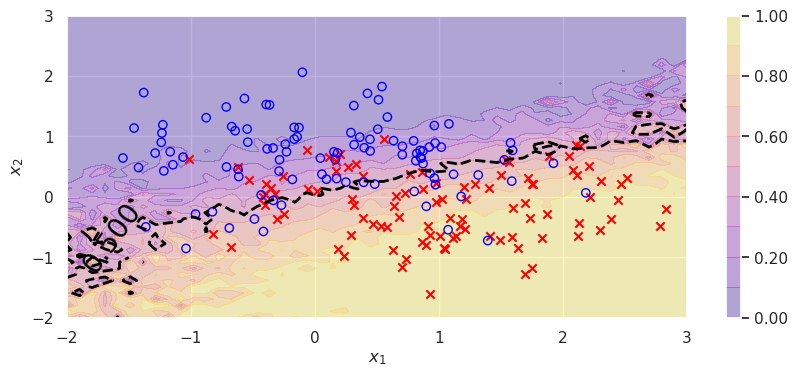

In [32]:
# Decision boundary
utils.plot_pt_2D(grid_x, grid_y, pred)
utils.plot_db_2D(grid_x, grid_y, pred, decision_boundary=0.5)
utils.plot_data_2D(X, y)

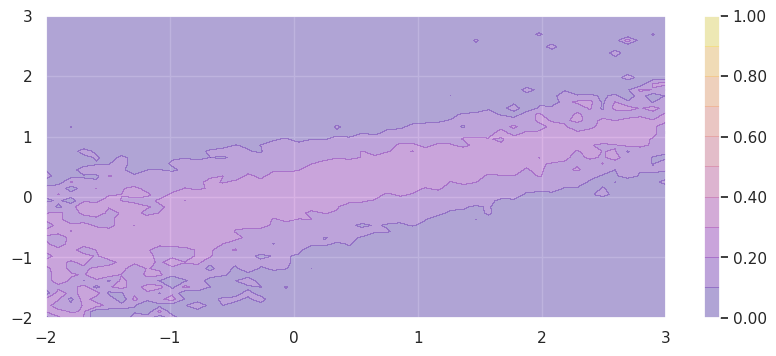

In [34]:
# Bernoulli variance 
sns.set(color_codes=False)
utils.plot_pt_2D(grid_x, grid_y, pvar)

### Exploration and Exploitation

Since the GP method can provide a formal measure of uncertainty estimate, this offers us a nice property to apply the __Explorating and Exploitation__ trade-off. Here I simply provide two popular bandits algorithms which have been extensively studied for several decades: Upper Confidence Bound (UCB) and Thompson Sampling (TS)

#### Upper Confidence Bound (UCB) for Sythetic Datasets

The Upper Confidence Bound (UCB) algorithm is used in the context of multi-armed bandit problems to balance exploration and exploitation by leveraging uncertainty estimates in the arm values. Here's an example of implementing UCB with a normal distribution in Python:

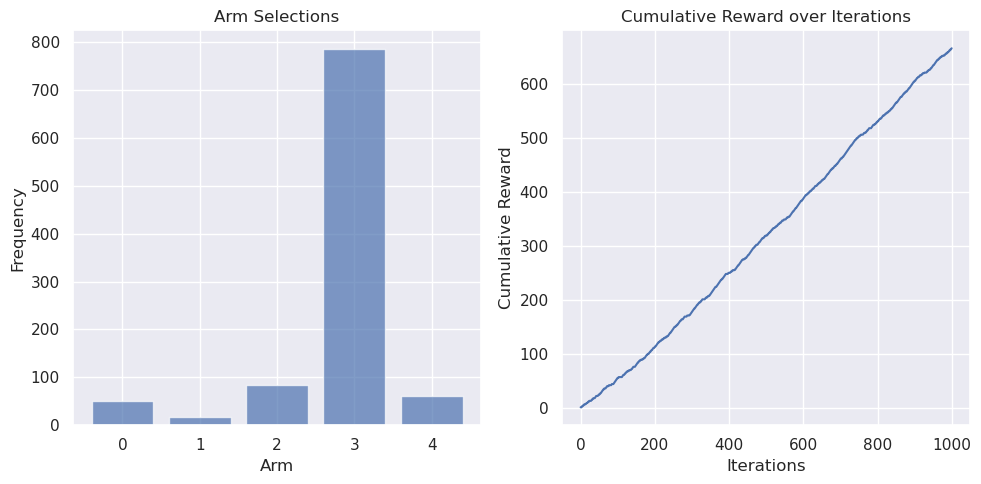

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Number of arms
num_arms = 5

# True mean rewards for each arm (unknown to the algorithm)
true_means = np.random.rand(num_arms)

# Store counts and sum of rewards for each arm
arm_counts = np.zeros(num_arms)
arm_rewards = np.zeros(num_arms)

# UCB exploration parameter
ucb_param = 2.0  # Tune this value for exploration-exploitation trade-off

# Function to calculate UCB value for each arm
def calculate_ucb(mean, count, total_counts):
    if count == 0:
        return float('inf')
    return mean + np.sqrt((ucb_param * np.log(total_counts)) / count)

# Simulating iterations
num_iterations = 1000
arm_selections = []
rewards = []

for i in range(num_iterations):
    # Select arm using UCB strategy
    ucb_values = [calculate_ucb(arm_rewards[j] / max(arm_counts[j], 1), arm_counts[j], sum(arm_counts)) for j in range(num_arms)]
    selected_arm = np.argmax(ucb_values)
    
    # Simulate reward (binary reward scenario)
    reward = np.random.binomial(1, true_means[selected_arm])
    
    # Update counts and rewards for the selected arm
    arm_counts[selected_arm] += 1
    arm_rewards[selected_arm] += reward
    
    # Store results
    arm_selections.append(selected_arm)
    rewards.append(reward)

# Plot results
plt.figure(figsize=(10, 5))

# Plot arm selections
plt.subplot(1, 2, 1)
plt.hist(arm_selections, bins=np.arange(num_arms + 1) - 0.5, rwidth=0.8, alpha=0.7)
plt.xlabel('Arm')
plt.ylabel('Frequency')
plt.title('Arm Selections')

# Plot cumulative reward
cumulative_rewards = np.cumsum(rewards)
plt.subplot(1, 2, 2)
plt.plot(cumulative_rewards)
plt.xlabel('Iterations')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward over Iterations')

plt.tight_layout()
plt.show()


#### Thompson Sampling (TS) for Sythetic Datasets

Thompson Sampling is a popular algorithm used in decision-making under uncertainty, often applied in the context of multi-armed bandit problems or reinforcement learning scenarios. It balances exploration and exploitation by sampling from the posterior distribution of the arms/actions based on their observed rewards.

Here's an example of how you might implement Thompson Sampling for a simple binary reward scenario (e.g., click-through rates of different website designs) in Python using Beta distributions for the arms:

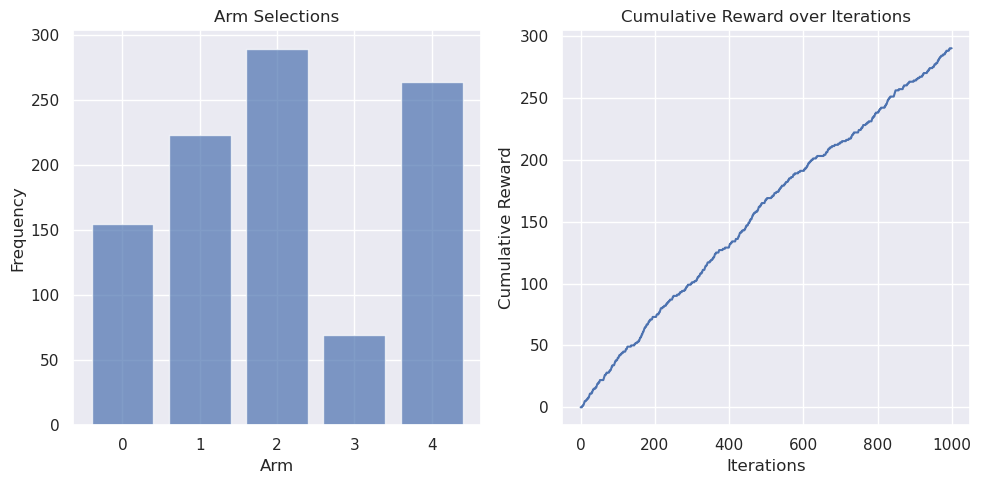

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Number of arms
num_arms = 5

# Initialize beta distribution parameters for each arm
alpha = np.ones(num_arms)  # Number of successes
beta = np.ones(num_arms)   # Number of failures

# Function to select arm using Thompson Sampling
def thompson_sampling(alpha, beta):
    samples = [np.random.beta(alpha[i], beta[i]) for i in range(num_arms)]
    return np.argmax(samples)

# Simulating iterations
num_iterations = 1000
arm_selections = []
rewards = []

for i in range(num_iterations):
    # Select arm using Thompson Sampling
    selected_arm = thompson_sampling(alpha, beta)
    
    # Simulate reward (for example, a click or not)
    reward = np.random.binomial(1, 0.3)  # Simulating a binary reward (30% chance of success)
    
    # Update alpha and beta based on reward
    if reward == 1:
        alpha[selected_arm] += 1
    else:
        beta[selected_arm] += 1
    
    # Store results
    arm_selections.append(selected_arm)
    rewards.append(reward)

# Plot results
plt.figure(figsize=(10, 5))

# Plot arm selections
plt.subplot(1, 2, 1)
plt.hist(arm_selections, bins=np.arange(num_arms + 1) - 0.5, rwidth=0.8, alpha=0.7)
plt.xlabel('Arm')
plt.ylabel('Frequency')
plt.title('Arm Selections')

# Plot cumulative reward
cumulative_rewards = np.cumsum(rewards)
plt.subplot(1, 2, 2)
plt.plot(cumulative_rewards)
plt.xlabel('Iterations')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward over Iterations')

plt.tight_layout()
plt.show()


#### Upper Confidence Bound (UCB) for pCTR Ranking

Given $q(\mathbf{f}) = \mathcal{N}(\mathbf{K}_{\mathbf{X}\mathbf{Z}}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1}\mathbf{m}, \mathbf{Q}_{\mathbf{X}\mathbf{X}} + \mathbf{K}_{\mathbf{X}\mathbf{Z}}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1} S \mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-T}\mathbf{K}_{\mathbf{Z}\mathbf{X}})$, where we define 
$$\mu(f) = \mathbf{K}_{\mathbf{X}\mathbf{Z}}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1}\mathbf{m}$$ 
$$\Sigma(f) = \mathbf{Q}_{\mathbf{X}\mathbf{X}} + \mathbf{K}_{\mathbf{X}\mathbf{Z}}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1} S \mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-T}\mathbf{K}_{\mathbf{Z}\mathbf{X}})$$ 
the predictive pctr for UCB method can be written as:

$$
pCTR_{\mathrm{UCB}} = \sigma(\mu(f) + \kappa \sqrt{\Sigma(f)})
$$

where $\kappa$ is a hyperparameter which balances the exploration-exploitation trafe-off.

#### Thompson Sampling (TS) for pCTR Ranking

Given $q(\mathbf{f}) = \mathcal{N}(\mathbf{K}_{\mathbf{X}\mathbf{Z}}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1}\mathbf{m}, \mathbf{Q}_{\mathbf{X}\mathbf{X}} + \mathbf{K}_{\mathbf{X}\mathbf{Z}}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1} S \mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-T}\mathbf{K}_{\mathbf{Z}\mathbf{X}})$, where we define 
$$\mu(f) = \mathbf{K}_{\mathbf{X}\mathbf{Z}}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1}\mathbf{m}$$ 
$$\Sigma(f) = \mathbf{Q}_{\mathbf{X}\mathbf{X}} + \mathbf{K}_{\mathbf{X}\mathbf{Z}}\mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-1} S \mathbf{K}_{\mathbf{Z}\mathbf{Z}}^{-T}\mathbf{K}_{\mathbf{Z}\mathbf{X}})$$ 
the predictive pctr for TS method can be written as:

$$
pCTR_{\mathrm{TS}} = \sigma(\hat{f})\; \mathrm{where}\; \hat{f}\sim\mathcal{N}(\mu(f), \Sigma(f))
$$

where $\hat{f}$ is randomly sampled from the posterior of $q(f)$

### Miscellaneous

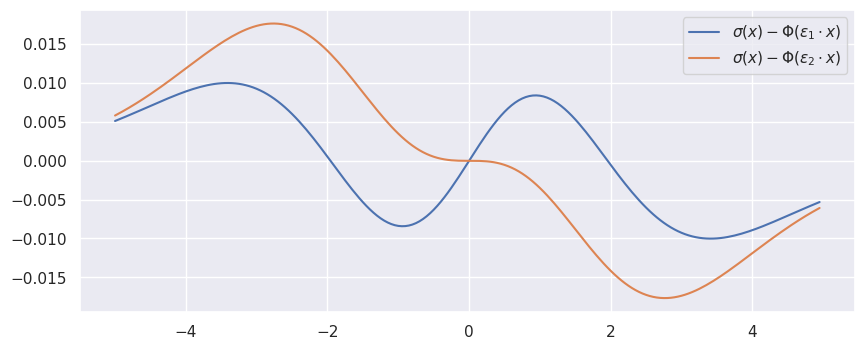

In [91]:
from scipy.stats import norm
from scipy.special import expit as sigmoid

x = np.arange(-5, 5, 0.05)
eps1 = np.sqrt(np.pi / 9)
eps2 = np.sqrt(np.pi / 8)
# eps = 1
# plt.plot(x, sigmoid(x), label=r"$\sigma(x)$")
# plt.plot(x, norm.cdf(eps * x), label=r"$\Phi(x)$")
plt.plot(x, sigmoid(x) - norm.cdf(eps1 * x), label=r"$\sigma(x) - \Phi(\varepsilon_1 \cdot x)$")
plt.plot(x, sigmoid(x) - norm.cdf(eps2 * x), label=r"$\sigma(x) - \Phi(\varepsilon_2 \cdot x)$")
plt.legend()

## References

\[1\] Kevin P. Murphy. [Machine Learning, A Probabilistic Perspective](https://mitpress.mit.edu/books/machine-learning-0), Chapters 4, 14 and 15.  

\[2\] Christopher M. Bishop. [Pattern Recognition and Machine Learning](http://www.springer.com/de/book/9780387310732), Chapter 6.  

\[3\] Carl Edward Rasmussen and Christopher K. I. Williams. [Gaussian Processes for Machine Learning](http://www.gaussianprocess.org/gpml/). 

\[4\] Martin Krasser's Blog. [Gaussian processes](http://krasserm.github.io/2018/03/19/gaussian-processes/).

\[5\] Martin Krasser's Blog. [Sparse Gaussian processes](http://krasserm.github.io/2020/12/12/gaussian-processes-sparse/).

\[6\] Titsias, M. (2009). [Variational learning of inducing variables in sparse Gaussian processes](http://proceedings.mlr.press/v5/titsias09a.html). In International Conference on Artificial Intelligence and Statistics (pp. 567–574).

\[7\] Matthews, A., Wilk, M., Nickson, T., Fujii, K., Boukouvalas, A., León-Villagrá, P., Ghahramani, Z., & Hensman, J. (2017). [GPflow: A Gaussian process library using TensorFlow](https://jmlr.org/papers/v18/16-537.html). Journal of Machine Learning Research 18(40), 1-6.

\[8\] Hensman, J., Fusi, N., & Lawrence, N. (2013). [Gaussian Processes for Big Data](https://arxiv.org/abs/1309.6835). In Proceedings of the Twenty-Ninth Conference on Uncertainty in Artificial Intelligence (pp. 282–290).